# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy 

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count

len(cities)
print (cities)

['ahipara', 'ostrovnoy', 'rikitea', 'tasiilaq', 'pokhara', 'greenwood', 'henties bay', 'mataura', 'tsihombe', 'mecca', 'bethel', 'albany', 'abu samrah', 'buala', 'hithadhoo', 'ivanovskoye', 'bluff', 'tagbac', 'richards bay', 'ponta do sol', 'punta arenas', 'benito juarez', 'radyvyliv', 'jalu', 'tuatapere', 'busselton', 'kahului', 'vaini', 'severo-kurilsk', 'cockburn town', 'shenjiamen', 'cape town', 'tuensang', 'kurilsk', 'lucea', 'luena', 'acapulco', 'kaitangata', 'port elizabeth', 'ushuaia', 'hobart', 'saint-philippe', 'tautira', 'leningradskiy', 'lagoa', 'husavik', 'vanavara', 'abha', 'souillac', 'mount gambier', 'bolungarvik', 'jamestown', 'illoqqortoormiut', 'brenham', 'tuktoyaktuk', 'arraial do cabo', 'belyy yar', 'uvat', 'tupik', 'bredasdorp', 'amderma', 'bantou', 'bathsheba', 'laguna', 'hirara', 'point pedro', 'guerrero negro', 'longlac', 'barrow', 'lompoc', 'mar del plata', 'muravlenko', 'sitka', 'suntar', 'saskylakh', 'wanlaweyn', 'dongsheng', 'carnarvon', 'ibra', 'sorland', 

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Variables
recnum = 0
setnum = 1
cities2 = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
maxtemp = []
windspeed = []

# Query URL
query_url = f"{url}appid={api_key}&units={units}&q="

print ('Beginning Data Retrieval') 
print ('-----------------------------')

# Loop through the list of cities
for city in cities:
    response = requests.get(query_url + city).json()
    
    if response['cod'] == '404':
        print ('City not found. Skipping...')
        
    elif recnum < 49:
        recnum = recnum + 1    
        print (f'Processing Record {recnum} of Set {setnum} | {city}')
        cities2.append(city)
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        maxtemp.append(response['main']['temp_max'])
        windspeed.append(response['wind']['speed'])
        
    else:
        recnum = 0
        setnum = setnum + 1
        print (f'Processing Record {recnum} of Set {setnum} | {city}')
        cities2.append(city)
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        maxtemp.append(response['main']['temp_max'])
        windspeed.append(response['wind']['speed'])
    

print ('-----------------------------')
print ('Data Retrieval Complete')      
print ('-----------------------------')

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | ahipara
Processing Record 2 of Set 1 | ostrovnoy
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | tasiilaq
Processing Record 5 of Set 1 | pokhara
Processing Record 6 of Set 1 | greenwood
Processing Record 7 of Set 1 | henties bay
Processing Record 8 of Set 1 | mataura
City not found. Skipping...
Processing Record 9 of Set 1 | mecca
Processing Record 10 of Set 1 | bethel
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | abu samrah
Processing Record 13 of Set 1 | buala
Processing Record 14 of Set 1 | hithadhoo
Processing Record 15 of Set 1 | ivanovskoye
Processing Record 16 of Set 1 | bluff
Processing Record 17 of Set 1 | tagbac
Processing Record 18 of Set 1 | richards bay
Processing Record 19 of Set 1 | ponta do sol
Processing Record 20 of Set 1 | punta arenas
Processing Record 21 of Set 1 | benito juarez
Processing Record 22 of Set 1 | radyvyliv
Processing Rec

Processing Record 36 of Set 4 | inuvik
Processing Record 37 of Set 4 | stokmarknes
Processing Record 38 of Set 4 | esperance
Processing Record 39 of Set 4 | bristol
Processing Record 40 of Set 4 | jumla
Processing Record 41 of Set 4 | taoudenni
City not found. Skipping...
Processing Record 42 of Set 4 | khatanga
Processing Record 43 of Set 4 | hasaki
Processing Record 44 of Set 4 | salalah
Processing Record 45 of Set 4 | sadovoye
Processing Record 46 of Set 4 | nyurba
Processing Record 47 of Set 4 | oistins
Processing Record 48 of Set 4 | faanui
Processing Record 49 of Set 4 | manaus
Processing Record 0 of Set 5 | erlensee
Processing Record 1 of Set 5 | brownsville
Processing Record 2 of Set 5 | melfi
Processing Record 3 of Set 5 | luderitz
Processing Record 4 of Set 5 | kavieng
Processing Record 5 of Set 5 | beysehir
City not found. Skipping...
City not found. Skipping...
Processing Record 6 of Set 5 | saint-georges
Processing Record 7 of Set 5 | pitimbu
Processing Record 8 of Set 5 |

Processing Record 24 of Set 8 | tevaitoa
Processing Record 25 of Set 8 | mana
Processing Record 26 of Set 8 | koslan
Processing Record 27 of Set 8 | emba
Processing Record 28 of Set 8 | kununurra
Processing Record 29 of Set 8 | isangel
Processing Record 30 of Set 8 | sao felix do xingu
Processing Record 31 of Set 8 | san patricio
Processing Record 32 of Set 8 | assiniboia
Processing Record 33 of Set 8 | millville
Processing Record 34 of Set 8 | meulaboh
Processing Record 35 of Set 8 | soroti
Processing Record 36 of Set 8 | nizwa
Processing Record 37 of Set 8 | mehamn
Processing Record 38 of Set 8 | bagua grande
City not found. Skipping...
Processing Record 39 of Set 8 | sola
Processing Record 40 of Set 8 | wexford
Processing Record 41 of Set 8 | talavera
Processing Record 42 of Set 8 | clovis
Processing Record 43 of Set 8 | zhigansk
Processing Record 44 of Set 8 | zhanaozen
Processing Record 45 of Set 8 | eureka
Processing Record 46 of Set 8 | maningrida
Processing Record 47 of Set 8 |

Processing Record 11 of Set 12 | pangoa
Processing Record 12 of Set 12 | tamandare
Processing Record 13 of Set 12 | sembakung
Processing Record 14 of Set 12 | hlobyne
Processing Record 15 of Set 12 | iztapa
City not found. Skipping...
City not found. Skipping...
Processing Record 16 of Set 12 | kulhudhuffushi
Processing Record 17 of Set 12 | angoche
Processing Record 18 of Set 12 | fort nelson
Processing Record 19 of Set 12 | namatanai
Processing Record 20 of Set 12 | kholuy
Processing Record 21 of Set 12 | minuri
Processing Record 22 of Set 12 | gat
Processing Record 23 of Set 12 | palmer
Processing Record 24 of Set 12 | guane
Processing Record 25 of Set 12 | ribeira brava
Processing Record 26 of Set 12 | paamiut
-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Create dataframe
city_data = pd.DataFrame(
    {'City': cities2,
     'Cloudiness': cloudiness,
     'Country': country,
     'Date': date,
     'Humidity': humidity,
     'Lat': lat,
     'Lng': lng,
     'Max Temp': maxtemp,
     'Wind Speed': windspeed
    })

city_data.to_csv(output_data_file, encoding='utf-8')
city_data.count()

City          576
Cloudiness    576
Country       576
Date          576
Humidity      576
Lat           576
Lng           576
Max Temp      576
Wind Speed    576
dtype: int64

In [5]:
city_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,ahipara,80,NZ,1540696737,86,-35.17,173.16,60.98,13.22
1,ostrovnoy,56,RU,1540696664,81,68.05,39.51,24.71,12.44
2,rikitea,56,PF,1540696594,100,-23.12,-134.97,73.22,13.22
3,tasiilaq,76,GL,1540695000,86,65.61,-37.64,30.20,17.22
4,pokhara,0,NP,1540696676,69,28.21,83.99,61.02,2.37


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

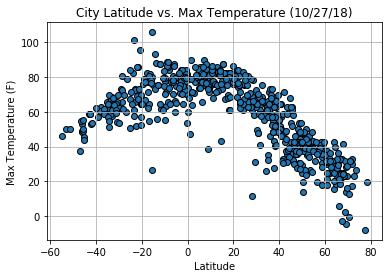

In [10]:
# Build scatter plot
plt.scatter(city_data['Lat'], city_data['Max Temp'], marker='o', edgecolors = 'black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Max Temperature (10/27/18)')
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("output_data/LatitudeVsMaxTemp.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

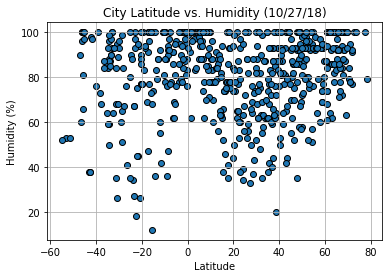

In [11]:
# Build scatter plot
plt.scatter(city_data['Lat'], city_data['Humidity'], marker='o', edgecolors = 'black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (10/27/18)')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("output_data/LatitudeVsHumidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

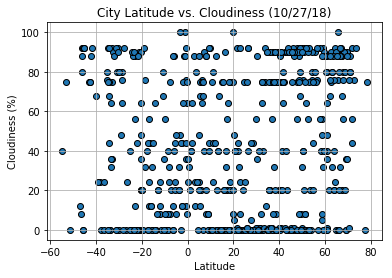

In [12]:
# Build scatter plot
plt.scatter(city_data['Lat'], city_data['Cloudiness'], marker='o', edgecolors = 'black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness (10/27/18)')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("output_data/LatitudeVsCloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

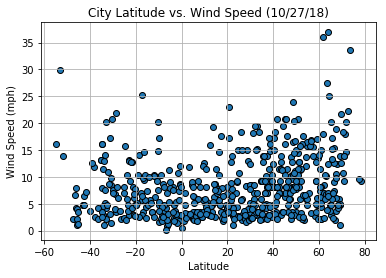

In [13]:
# Build scatter plot
plt.scatter(city_data['Lat'], city_data['Wind Speed'], marker='o', edgecolors = 'black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed (10/27/18)')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("output_data/LatitudeVsWindSpeed.png")

# Show plot
plt.show()